In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
color = sns.color_palette()

Populating the interactive namespace from numpy and matplotlib


Tests groupby

In [3]:
df = pd.DataFrame({
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })

In [4]:
df

,A,B,C,D
0,foo,one,0.327524,1.526572
1,bar,one,-0.993172,-0.177472
2,foo,two,0.036681,0.483991
3,bar,three,-0.235329,-1.686586
4,foo,two,1.086501,-2.205616
5,bar,two,0.402314,0.161432
6,foo,one,1.100179,-0.954813
7,foo,three,0.221919,0.755820


In [19]:
grouped = df.groupby('A')
grouped.groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [6]:
grouped = df.groupby(['A', 'B'])
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [15]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4], 'Z': ['a', 'b', 'c', 'd'], 'W': [23, 34, 45, 56]})
df2

,W,X,Y,Z
0,23,B,1,a
1,34,B,2,b
2,45,A,3,c
3,56,A,4,d


In [16]:
df2.groupby(['X']).sum()

,W,Y
X,,
A,101,7
B,57,3


A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

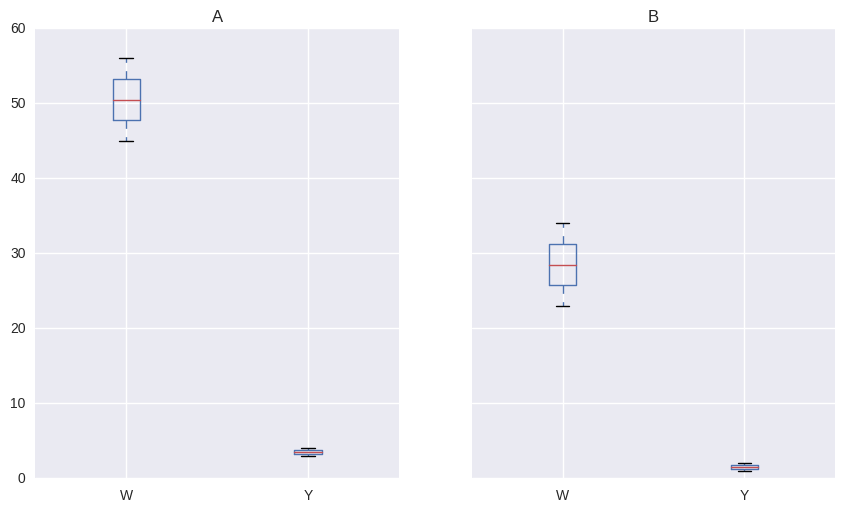

In [23]:
gb = df2.groupby(['X'])
gb.boxplot()

In [25]:
print gb.agg('mean')
print gb.agg('size')

      W    Y
X           
A  50.5  3.5
B  28.5  1.5
X
A    2
B    2
dtype: int64


In [27]:
v = gb.agg('size').value_counts()
print v
print v.index, v.values

2    2
dtype: int64
Int64Index([2], dtype='int64') [2]
